# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore")

# reading the xls file

In [3]:
df = pd.read_excel('iris.xls')

In [4]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# data preprocessing

In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
a=df["SL"].mean()

In [9]:
a

5.8559440559440565

In [10]:
df["SL"].fillna(a,inplace=True)

In [11]:
b=df["SW"].mean()

In [12]:
b

3.0493055555555566

In [13]:
df["SW"].fillna(b,inplace=True)

In [14]:
c=df["PL"].mean()

In [15]:
c

3.756250000000003

In [16]:
df["PL"].fillna(c,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [19]:
df[df.duplicated()]

,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [20]:
df = df.drop_duplicates()

In [21]:
df.shape

(147, 5)

In [22]:
df.describe()

,SL,SW,PL,PW
count,147.000000,147.000000,147.000000,147.000000
mean,5.869331,3.050992,3.777806,1.208844
std,0.808920,0.425170,1.719268,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.855944,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
df['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
df['Classification'].nunique()

3

In [25]:
df['Classification'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Classification, dtype: int64

In [26]:
df['Classification'].value_counts(normalize=True)

Iris-versicolor    0.340136
Iris-virginica     0.333333
Iris-setosa        0.326531
Name: Classification, dtype: float64

# data visualization

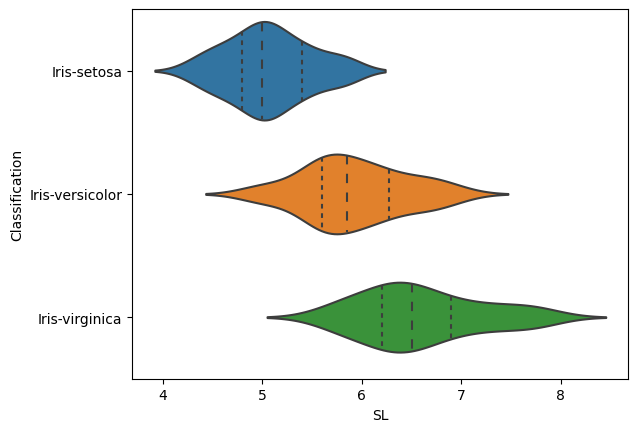

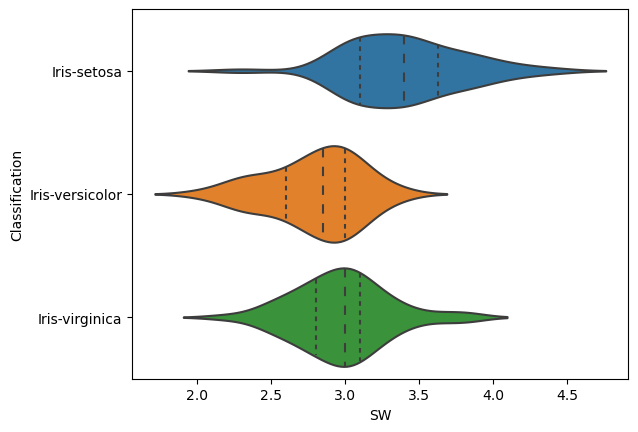

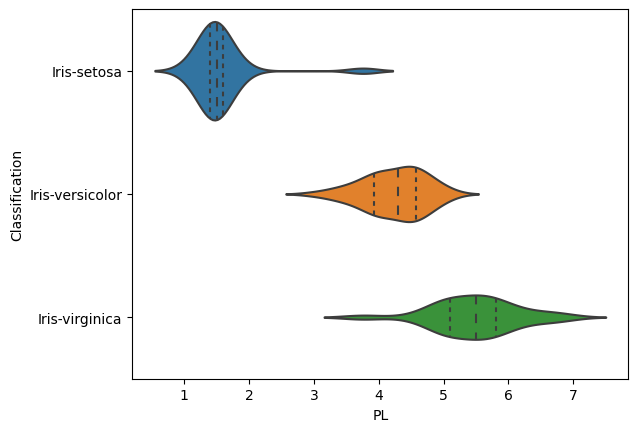

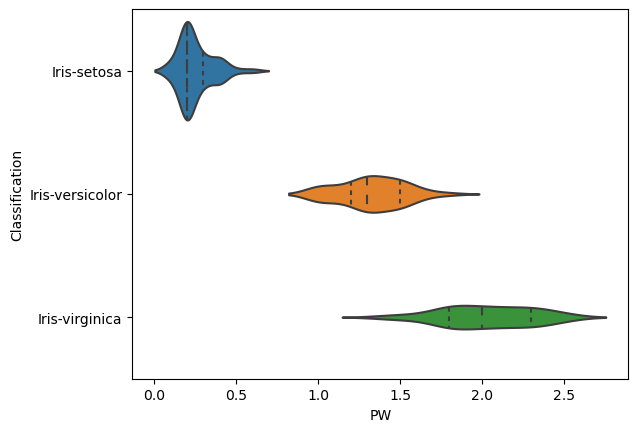

In [27]:
g = sns.violinplot(y='Classification', x='SL', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Classification', x='SW', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Classification', x='PL', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Classification', x='PW', data=df, inner='quartile')
plt.show()

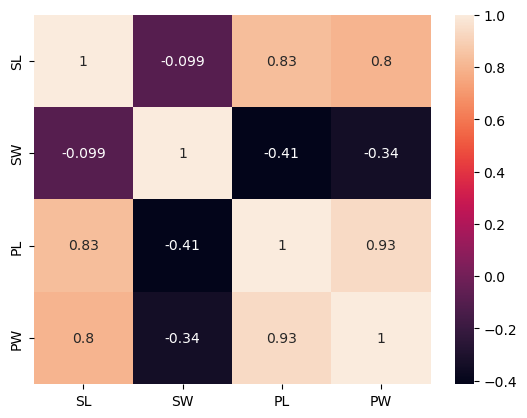

In [28]:
sns.heatmap(df.corr(), annot = True);

# label encoding 

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Classification']=le.fit_transform(df['Classification'])

In [30]:
df

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              147 non-null    float64
 1   SW              147 non-null    float64
 2   PL              147 non-null    float64
 3   PW              147 non-null    float64
 4   Classification  147 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.9 KB


# splitting to feature and target

In [32]:
y = df['Classification']
x = df.drop(['Classification'], axis=1)

In [33]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 147, dtype: int64

In [34]:
x

,SL,SW,PL,PW
0,5.100000,3.5,1.40000,0.2
1,4.900000,3.0,1.40000,0.2
2,5.855944,3.2,1.30000,0.2
3,4.600000,3.1,1.50000,0.2
4,5.000000,3.6,1.40000,0.2
...,...,...,...,...
145,6.700000,3.0,5.20000,2.3
146,6.300000,2.5,5.00000,1.9
147,6.500000,3.0,3.75625,2.0
148,6.200000,3.4,5.40000,2.3


# spliting for training and testing

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

In [36]:
x_train.shape

(110, 4)

In [37]:
y_train.shape

(110,)

# standardizing

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# building the logistic regression model

In [39]:
from sklearn.linear_model import LogisticRegression
lrclf = LogisticRegression()
lrclf.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred_lr=lrclf.predict (x_test)

# evalauting the  logistic regression model

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [42]:
print('accuracy = ', accuracy_score(y_test,y_pred_lr))

accuracy =  0.9459459459459459


In [43]:
print( confusion_matrix(y_test,y_pred_lr))

[[14  0  0]
 [ 0  8  2]
 [ 0  0 13]]


In [44]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.80      0.89        10
           2       0.87      1.00      0.93        13

    accuracy                           0.95        37
   macro avg       0.96      0.93      0.94        37
weighted avg       0.95      0.95      0.94        37



In [45]:
accuracy=accuracy_score(y_test,y_pred_lr)*100
print("Accuracy of the model is {:.2f}".format(accuracy))



Accuracy of the model is 94.59


# building the kNN model

In [46]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1, 15)


for k in neighbors:
    knnclf = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    knnclf.fit (x_train,y_train)
    y_pred_knn = knnclf.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

In [47]:
metric_k

[0.918918918918919,
 0.972972972972973,
 0.9459459459459459,
 0.972972972972973,
 0.9459459459459459,
 0.9459459459459459,
 0.9459459459459459,
 0.9459459459459459,
 0.9459459459459459,
 0.9459459459459459,
 0.9459459459459459,
 0.972972972972973,
 0.9459459459459459,
 0.918918918918919]

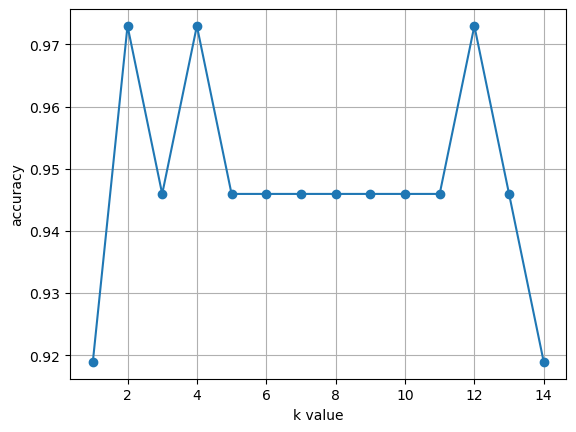

In [48]:
plt.plot (neighbors, metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [49]:
knnclf = KNeighborsClassifier(n_neighbors=2,metric='minkowski',p=2)
knnclf.fit (x_train,y_train)
y_pred_knn = knnclf.predict(x_test)
acc = accuracy_score(y_test,y_pred_knn)
   

# evaluating the kNN model

In [50]:
print('accuracy = ', accuracy_score(y_test,y_pred_knn))

accuracy =  0.972972972972973


In [51]:
print( confusion_matrix(y_test,y_pred_knn))

[[14  0  0]
 [ 0  9  1]
 [ 0  0 13]]


In [52]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.96        13

    accuracy                           0.97        37
   macro avg       0.98      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



In [53]:
accuracy=accuracy_score(y_test,y_pred_knn )*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 97.30


# building the SVM model (kernal = linear)

In [54]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [55]:
y_pred_svm = svmclf.predict (x_test)

# evaluating the SVM_linear model

In [56]:
print('accuracy = ', accuracy_score(y_test,y_pred_svm))

accuracy =  0.9459459459459459


In [57]:
print( confusion_matrix(y_test,y_pred_svm))

[[14  0  0]
 [ 0  8  2]
 [ 0  0 13]]


In [58]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.80      0.89        10
           2       0.87      1.00      0.93        13

    accuracy                           0.95        37
   macro avg       0.96      0.93      0.94        37
weighted avg       0.95      0.95      0.94        37



In [59]:
accuracy=accuracy_score(y_test,y_pred_svm)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 94.59


# building the SVM model (kernal = RBF)

In [60]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'rbf')
svmclf.fit(x_train,y_train)

SVC()

In [61]:
y_pred_svm = svmclf.predict (x_test)

# evaluating the SVM_rbf model

In [62]:
print('accuracy = ',accuracy_score(y_test,y_pred_svm))

accuracy =  0.9459459459459459


In [63]:
print( confusion_matrix(y_test,y_pred_svm))

[[14  0  0]
 [ 0  8  2]
 [ 0  0 13]]


In [64]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.80      0.89        10
           2       0.87      1.00      0.93        13

    accuracy                           0.95        37
   macro avg       0.96      0.93      0.94        37
weighted avg       0.95      0.95      0.94        37



In [65]:
accuracy=accuracy_score(y_test,y_pred_svm)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 94.59


# building the SVM model (kernal = polynomial)

In [66]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'poly')
svmclf.fit(x_train,y_train)

SVC(kernel='poly')

In [67]:
y_pred_svm = svmclf.predict (x_test)

# evaluating the SVM_poly model

In [68]:
print('accuracy = ',accuracy_score(y_test,y_pred_svm))

accuracy =  0.918918918918919


In [69]:
print( confusion_matrix(y_test,y_pred_svm))

[[14  0  0]
 [ 0  9  1]
 [ 0  2 11]]


In [70]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.82      0.90      0.86        10
           2       0.92      0.85      0.88        13

    accuracy                           0.92        37
   macro avg       0.91      0.92      0.91        37
weighted avg       0.92      0.92      0.92        37



In [71]:
accuracy=accuracy_score(y_test,y_pred_svm)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 91.89


# building the decision tree model

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier (random_state=42,criterion='gini',)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [73]:
y_pred_dt = dt_clf.predict(x_test)

# evaluating the decision tree model

In [74]:
print('accuracy = ',accuracy_score (y_test,y_pred_dt))

accuracy =  0.9459459459459459


In [75]:
print(confusion_matrix (y_test,y_pred_dt))

[[14  0  0]
 [ 0  9  1]
 [ 0  1 12]]


In [76]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        13

    accuracy                           0.95        37
   macro avg       0.94      0.94      0.94        37
weighted avg       0.95      0.95      0.95        37



In [77]:
accuracy=accuracy_score(y_test,y_pred_dt)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 94.59


# building the random forest model

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [79]:
y_pred_rf = rf_clf.predict(x_test)

# evaluating the random forest model

In [80]:
print('accuracy = ',accuracy_score (y_test,y_pred_rf))

accuracy =  0.972972972972973


In [81]:
print(confusion_matrix (y_test,y_pred_rf))

[[14  0  0]
 [ 0  9  1]
 [ 0  0 13]]


In [82]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.96        13

    accuracy                           0.97        37
   macro avg       0.98      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



In [83]:
accuracy=accuracy_score(y_test,y_pred_rf)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 97.30


## The best result is given by k-NN classifier and Random Forest classifier,we got an accuracy of 97.3% for both ,which shows that the model we built is very accurate.